In [26]:
from scipy.io import loadmat
import numpy as np
import  matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [ ]:
## load file
whole = loadmat('characters10.mat')
print("MATLAB文件中的变量:", whole.keys())

## get data
train_data_whole = whole['train_data']
test_data_whole = whole['test_data']
train_label_whole = whole['train_label']
test_label_whole = whole['test_label']

class_3_train_idx = np.where(train_label_whole == 3)
class_4_train_idx = np.where(train_label_whole == 4)

class_3_test_idx = np.where(test_label_whole == 3)
class_4_test_idx = np.where(test_label_whole == 4)

class_4_test_idx[0].shape

In [2]:
## choose class 3 and 4
# get train_X and test_X
class_3_train_X = train_data_whole[class_3_train_idx[0]]
class_3_test_X = test_data_whole[class_3_test_idx[0]]
class_4_train_X = train_data_whole[class_4_train_idx[0]]
class_4_test_X = test_data_whole[class_4_test_idx[0]]

# get ttrain_Y and test_Y
class_3_train_Y = train_label_whole[class_3_train_idx[0]]
class_3_test_Y = test_label_whole[class_3_test_idx[0]]
class_4_train_Y = train_label_whole[class_4_train_idx[0]]
class_4_test_Y = test_label_whole[class_4_test_idx[0]]

## change label 3 into 0, and label 4 into 1
class_3_train_Y = np.zeros_like(class_3_train_Y)
class_3_test_Y = np.zeros_like(class_3_test_Y)
class_4_train_Y = np.ones_like(class_4_train_Y)
class_4_test_Y = np.ones_like(class_4_test_Y)
#class_3_test_Y,class_4_test_Y

In [3]:
### group class 3 and 4 data and labels together

X_train = np.vstack((class_3_train_X,class_4_train_X))
Y_train = np.vstack((class_3_train_Y,class_4_train_Y))
X_test = np.vstack((class_3_test_X,class_4_test_X))
Y_test = np.vstack((class_3_test_Y,class_4_test_Y))

# standardization
X_train = X_train/255.0
X_test = X_test/255.0

## Q(1) 
 Use the “Exact Interpolation” method (as described in pages 17-26 of lecture five)
and apply regularization (as described in pages 43-46 of lecture five). Assume the RBF 
is Gaussian function with standard deviation of 100. Firstly, determine the weights of 
RBFN without regularization and evaluate its performance; then vary the value of 
regularization factor and study its effect on the resulting RBFNs’ performance.

In [153]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist, squareform
class RBFN:
    def __init__(self, centers,flag, sigma=100, lamda = 0.5 ):
        self.sigma = sigma
        self.centers = centers
        self.weights = None
        self.flag = flag
        self.lamda = lamda

    def _kernel_function(self, X, centers):
        
        phi = np.zeros((X.shape[0],600))
        for j in range (X.shape[0]):
            for i in range ( 600 ):
                norm_ele = np.linalg.norm(X[j]- centers[i])
                phi[j][i] = np.exp(- norm_ele**2/ (2*self.sigma**2))
                
        return phi
    
    def fit(self, X, y):
        Phi = self._kernel_function(X, self.centers)
        #print(Phi, Phi.shape)
        self.weights = np.linalg.inv(Phi)@ y #np.linalg.lstsq(Phi, y, rcond=None)[0]
        
        if self.flag ==1:
            print('regularization method')
            self.weights = np.linalg.inv(Phi.T@Phi+self.lamda * np.eye(600) ) @Phi.T@ y 
        
        #print('weights:\n',self.weights)
        return self.weights
        
    def predict(self, X):
        Phi = self._kernel_function(X, self.centers)
        return np.dot(Phi, self.weights)


In [178]:
### calculation of prediction accuracy
def accuracy(TrPred,TePred ):
    TrAcc = []
    TeAcc = []
    thr = []
    TrN = len(Y_train)
    TeN = len(Y_test)
    for i in range(1000) :
        t = (max(TrPred)-min(TrPred)) * (i-1)/1000 + min(TrPred)
        #print(t)
        thr.append(t)
        tr_idx_0 = np.where(TrPred < t)[0]
        tr_index_1 = np.where(TrPred >= t)[0]
        te_idx_0 = np.where(TePred < t)[0]
        te_index_1 = np.where(TePred >= t)[0]
        
        # accuracy
        TrAcc.append(  (np.sum(Y_train[tr_idx_0] == 0) + np.sum(Y_train[tr_index_1] == 1)) / TrN  )
        TeAcc.append( (np.sum(Y_test[te_idx_0] == 0) + np.sum(Y_test[te_index_1] == 1)) / TeN   )
        
    plt.figure()
    plt.plot(thr,TrAcc,color = 'yellow',label ='tr')
    plt.plot(thr,TeAcc,color = 'blue', label = 'te')
    plt.ylabel('Accuracy')
    plt.xlabel('Threshold')
    plt.grid()
    plt.legend(loc = 'best')

    return 0
                     

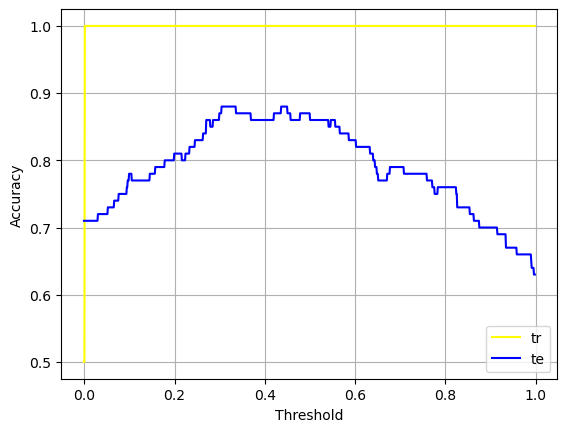

In [175]:
#  train RBFN model without Regularization
rbfn_Q1 = RBFN(centers = X_train, flag = 0, sigma=100 ,lamda = 0  )
w = rbfn_Q1.fit(X_train, Y_train)
print('weights:\n',w)
y_train_pred = rbfn_Q1.predict(X_train)
y_test_pred = rbfn_Q1.predict(X_test)
acc = accuracy(y_train_pred , y_test_pred)


regularization method


0

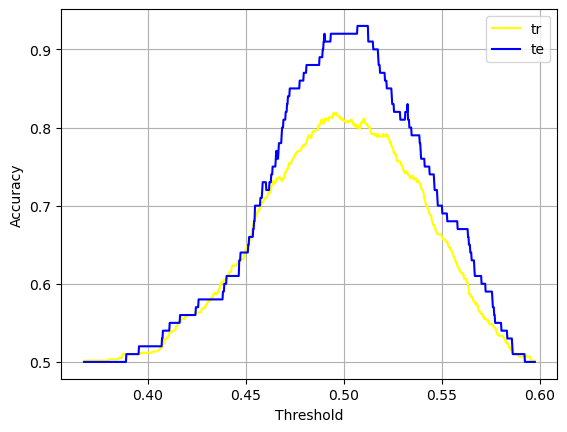

In [176]:
#  train RBFN model with Regularization, factor is lamda
rbfn_Q1 = RBFN(centers = X_train, flag = 1, sigma=100 ,lamda = 0.5  )
w = rbfn_Q1.fit(X_train, Y_train)
y_train_pred = rbfn_Q1.predict(X_train)
y_test_pred = rbfn_Q1.predict(X_test)
accuracy(y_train_pred , y_test_pred)


regularization method
regularization method
regularization method
regularization method


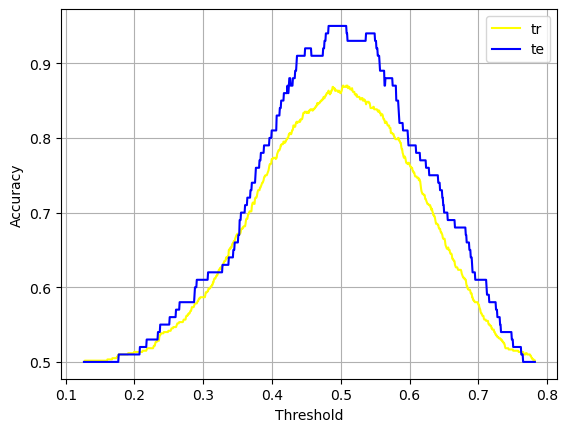

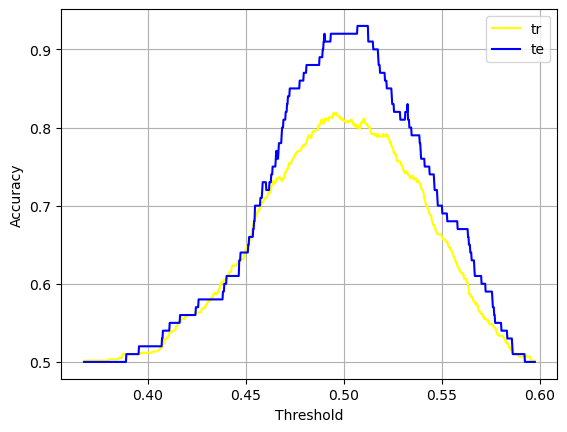

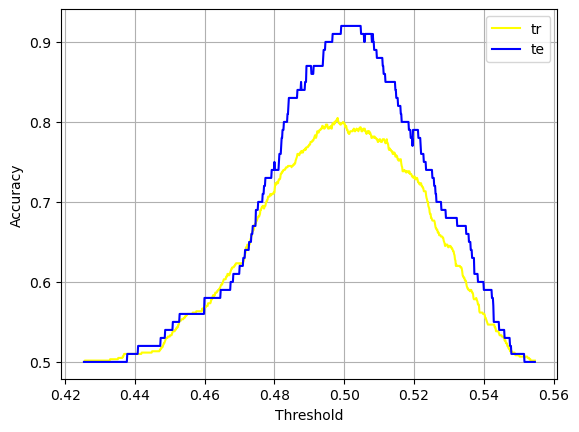

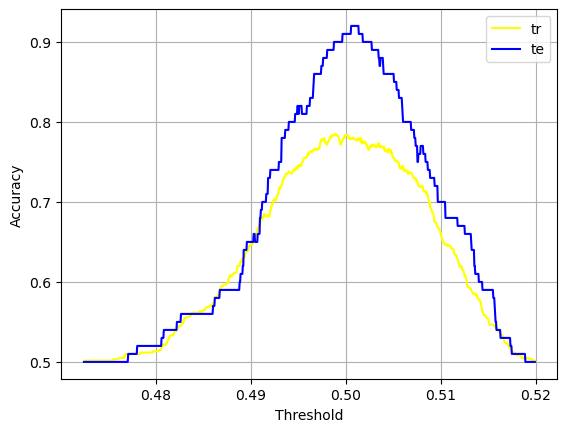

In [180]:
### vary factor value
for fac in [0.1,0.5,1,3]:
    rbfn_Q1 = RBFN(centers = X_train, flag = 1, sigma=100 ,lamda = fac  )
    w = rbfn_Q1.fit(X_train, Y_train)
    y_train_pred = rbfn_Q1.predict(X_train)
    y_test_pred = rbfn_Q1.predict(X_test)
    accuracy(y_train_pred , y_test_pred)

## Q(2)
Follow the strategy of “Fixed Centers Selected at Random” (as described in page 38
of lecture five). Randomly select 100 centers among the training samples. Firstly, 
determine the weights of RBFN with widths fixed at an appropriate size and compare 
its performance to the result of a); then vary the value of width from 0.1 to 10000 and 
study its effect on the resulting RBFNs’ performance.

In [181]:
class RBFN_random_center:
    def __init__(self, centers, width=100 ):
        self.width = width
        self.centers = centers
        self.weights = None

    def _kernel_function(self, X, centers):
        
        phi = np.zeros((X.shape[0],100))
        for j in range (X.shape[0]):
            for i in range ( 100 ):
                norm_ele = np.linalg.norm(X[j]- centers[i])
                phi[j][i] = np.exp(- norm_ele**2/ (2*self.width**2))
                
        return phi
    
    def fit(self, X, y):
        Phi = self._kernel_function(X, self.centers)
        self.weights =np.linalg.lstsq(Phi, y, rcond=None)[0] #np.linalg.lstsq(Phi, y, rcond=None)[0]
        
        #if self.flag ==1:
        #    print('regularization method')
        #    self.weights = np.linalg.inv(Phi.T@Phi+self.lamda * np.eye(600) ) @Phi.T@ y 
        
        #print('weights:\n',self.weights)
        return self.weights
        
    def predict(self, X):
        Phi = self._kernel_function(X, self.centers)
        return np.dot(Phi, self.weights)


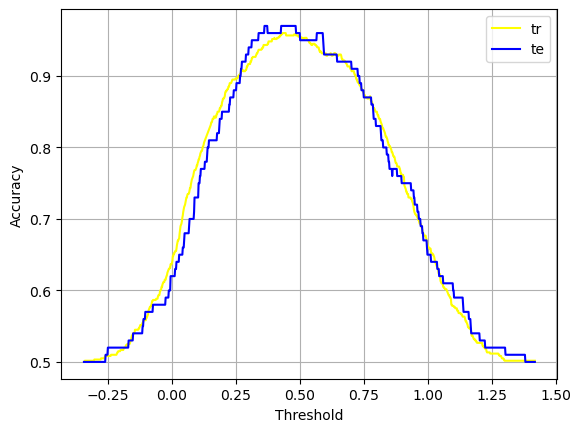

In [184]:
# randomly select 100 centers
np.random.seed(88)
random_indices = np.random.choice(X_train.shape[0], size=100, replace=False)
centers = X_train[random_indices]

## fixed size randome center model fitting
rbfn_ran_cen = RBFN_random_center(centers)
weights = rbfn_ran_cen.fit(X_train, Y_train)
y_train_pred = rbfn_ran_cen.predict(X_train)
y_test_pred = rbfn_ran_cen.predict(X_test)
acc = accuracy(y_train_pred , y_test_pred)

width: 0.1
width: 3
width: 5
width: 10
width: 10000


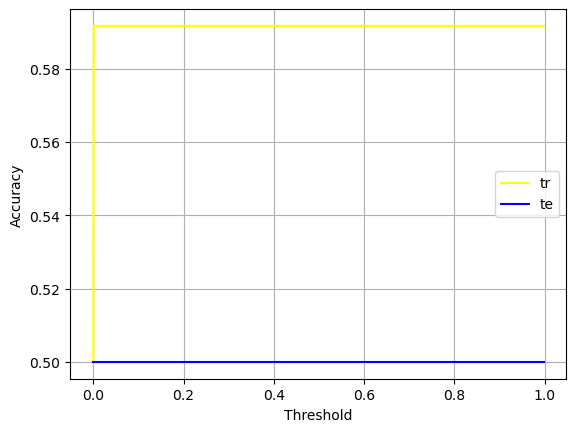

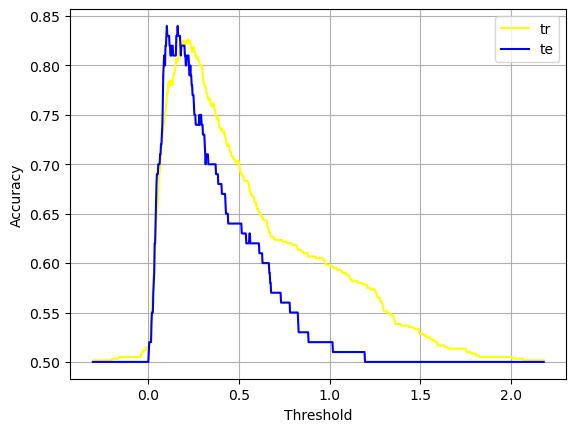

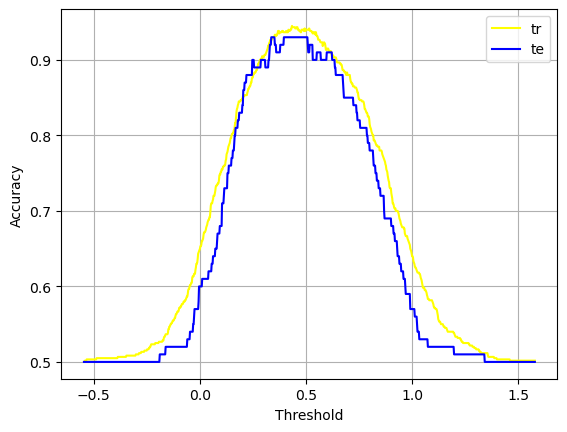

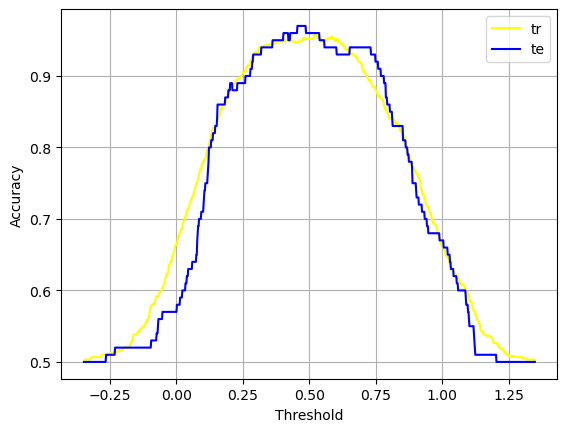

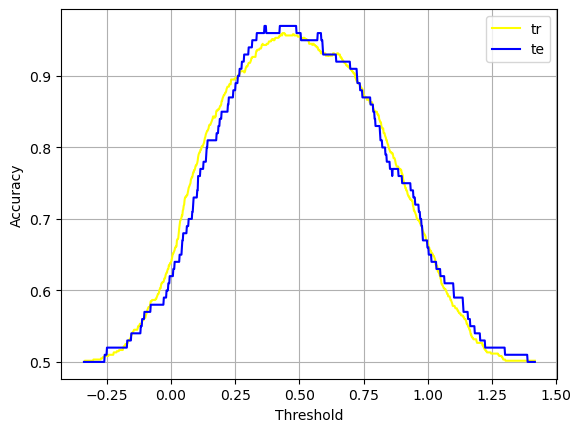

In [185]:
for d in [0.1,3,5,10,100,10000]:
    print('width:',d)
    rbfn_ran_cen = RBFN_random_center(centers, d)
    weights = rbfn_ran_cen.fit(X_train, Y_train)
    y_train_pred = rbfn_ran_cen.predict(X_train)
    y_test_pred = rbfn_ran_cen.predict(X_test)
    acc = accuracy(y_train_pred , y_test_pred)

## Q3

 Try classical “K-Mean Clustering” (as described in pages 39-40 of lecture five) with 
2 centers. Firstly, determine the weights of RBFN and evaluate its performance; then 
visualize the obtained centers and compare them to the mean of training images of each 
class. State your findings.

In [197]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

### PCA
pca = PCA(n_components=20)
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 1. 使用 K-means 进行聚类
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)  # 假设 X_train 是训练数据集
cluster_centers = kmeans.cluster_centers_

class RBFN_kmean:
    def __init__(self, centers, sigma=100 ):
        self.centers = centers
        self.sigma = sigma


    def _kernel_function(self, X, centers):
        
        phi = np.zeros((X.shape[0],2))
        for j in range (X.shape[0]):
            for i in range (2):
                norm_ele = np.linalg.norm(X[j]- centers[i])
                phi[j][i] = np.exp(- norm_ele**2/ (2*self.sigma**2))
                
        return phi

    def fit(self, X, y):
        Phi = self._kernel_function(X, self.centers)
        self.weights = np.linalg.lstsq(Phi, y, rcond=None)[0]

        return self.weights, self.centers

    def predict(self, X):
        Phi = self._kernel_function(X, self.centers)
        return np.dot(Phi, self.weights)

H:\Anaconda3_2021\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
H:\Anaconda3_2021\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


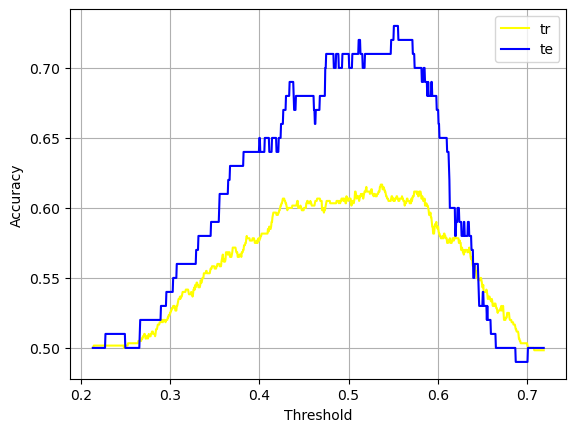

In [198]:
## K-MEAN clustering method

rbfn_kmean = RBFN_kmean(cluster_centers,sigma = 100)
w, centers = rbfn_kmean.fit(X_train, Y_train)
y_train_pred = rbfn_kmean.predict(X_train)
y_test_pred = rbfn_kmean.predict(X_test)
acc = accuracy(y_train_pred , y_test_pred)



In [221]:
np.mean(cluster_centers[0]),np.mean(X_train[:300])

(0.21061960784313727, 0.20654765239429104)

In [222]:
np.mean(cluster_centers[1]),np.mean(X_train[300:])

(0.19590180357857426, 0.19752079164999328)

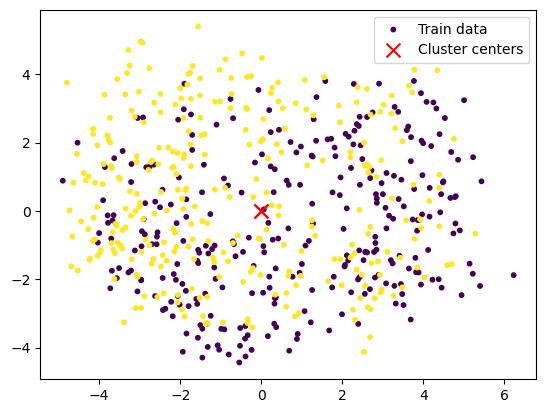

In [205]:
plt.scatter(X_train[:, 0], X_pca[:, 1], c=Y_train, cmap='viridis', s=10, label='Train data')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s = 100, label='Cluster centers')
plt.legend(loc='best')

In [212]:
X_class0_mean = np.mean(X_train[:300], axis = 1)
X_class1_mean = np.mean(X_train[300:], axis = 1)

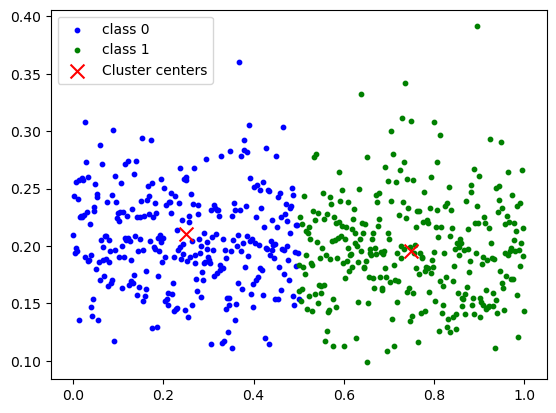

In [220]:
plt.scatter(np.linspace(0,0.5,300), X_class0_mean, color = 'blue',  s=10, label='class 0')
plt.scatter(np.linspace(0.5,1, 300), X_class1_mean, color = 'green',  s=10, label='class 1')
plt.scatter([0.25,0.75], [np.mean(centers[0]), np.mean(centers[1]) ] , c='red', marker='x', s = 100, label='Cluster centers')
plt.legend(loc='best')